<a href="https://colab.research.google.com/github/rtajeong/DSAC_Lab3_4/blob/master/lab_05_keras_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
- from https://keras.io/guides/functional_api/

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

## Input and Dense layers

---

In [ ]:
inputs = Input(shape=(784,))   # 784-dimensional vector. The batch size is always omitted 
                                     # since only the shape of each sample is specified.
img_inputs = Input(shape=(32, 32, 3))

In [ ]:
inputs.shape, img_inputs.shape, inputs.dtype, img_inputs.dtype

(TensorShape([None, 784]),
 TensorShape([None, 32, 32, 3]),
 tf.float32,
 tf.float32)

### using Functional API

In [ ]:
inputs = Input(shape=(784,))
x = Dense(64, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
outputs = Dense(10)(x)

- Define Model

In [ ]:
# create a Model by specifying its inputs and outputs in the graph of layers
model = Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# no of parameters to train
# 784 * 64 + 64 = 50240
# 64 * 64 + 64 = 4160
# 64 * 10 + 10 = 650

### using Sequential API

In [ ]:
# another type model definition
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


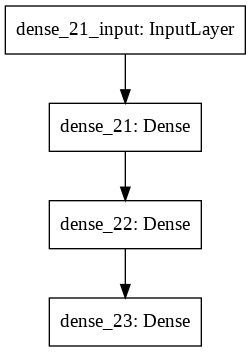

In [ ]:
# plot the model
keras.utils.plot_model(model, "my_first_model.png")

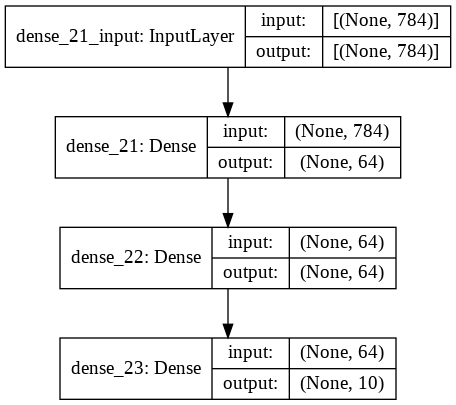

In [ ]:
# optionally, display the input and output shapes of each layer in the plotted graph:

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## Training, evaluation, and Inference

---
- try to use Sequential() model, with MNIST dataset

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255.
x_test = x_test.reshape(10000, 784).astype("float32") / 255.


In [ ]:
# one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
480/480 [==============================] - 4s 3ms/step - loss: 0.4013 - accuracy: 0.8867 - val_loss: 0.2063 - val_accuracy: 0.9430
Epoch 2/5
480/480 [==============================] - 1s 3ms/step - loss: 0.1712 - accuracy: 0.9504 - val_loss: 0.1422 - val_accuracy: 0.9600
Epoch 3/5
480/480 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9632 - val_loss: 0.1173 - val_accuracy: 0.9663
Epoch 4/5
480/480 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9714 - val_loss: 0.1061 - val_accuracy: 0.9682
Epoch 5/5
480/480 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9763 - val_loss: 0.1016 - val_accuracy: 0.9693
313/313 - 1s - loss: 0.1009 - accuracy: 0.9692
Test loss: 0.10085850954055786
Test accuracy: 0.9692000150680542


- we can see that size(train)=60000*0.8=48000 (480 steps/epoch)
- and size(val) = 60000*0.2=12000 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Save the model
---

- There are two different types of saving models
  - Tensorflow SavedModel (recommended)
  - previous keras H5 (simplified version)
  - for more information: see https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [ ]:
# method 1: savedmodel type
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model/assets


In [ ]:
# method 2: h5 type
model.save("my_model.h5")
del model
model = keras.models.load_model("my_model.h5")

## To define multiple models
- a single graph of layers can be used to generate multiple models

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x) 
            # (batch_size, rows, columns, channels)->(batch_size, channels)

encoder = Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

### more information about de-convolution

--- 

- Convolutions
  - Convolutions
  - Dilated Convolutions (a.k.s Astrous Convolutions)
  - Transposed Convolutions (a.k.a. deconvolutions or fractionally strided convolutions)
  - Separable Convolutions
  - from https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

- Difference between UpSample2D and Conv2DTranspose

  - simple scaling up vs. trained 
  - UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.
  - Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.
- transposed convolution
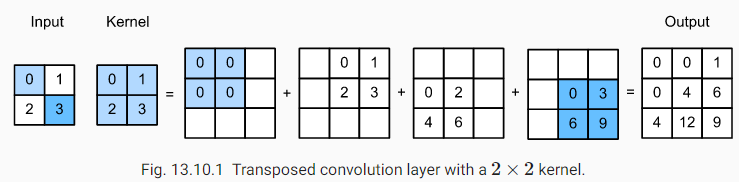

## All models are callable, just like layers
---

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)  # pool size equals to the size of the input 

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

## Backend operation
- keras is a model-level library, so does not have low-level operations, such as tensor products, convolutions, so on.
- It uses Backend library for low-level functions.

In [ ]:
!more $HOME/.keras/keras.json   # backend (for low level functions) is tensorflow
                                # among Tensorflow, Theano, CNTK

{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "tensorflow"
}


In [ ]:
from tensorflow.keras import backend as K
a = K.constant([[1,-1],[-1,0]], dtype=tf.float32, shape=[2,2])
K.dot(a, K.transpose(a))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2., -1.],
       [-1.,  1.]], dtype=float32)>

In [ ]:
np.random.normal(2, size=(2,2))

array([[ 3.29119195,  1.6453982 ],
       [-0.59987977,  0.06872125]])

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
type(tf.ones((2,2,2)))

tensorflow.python.framework.ops.EagerTensor

In [ ]:
x1 = K.placeholder((1,2))
x2 = K.variable((1,2))
x1, x2

(<KerasTensor: shape=(1, 2) dtype=float32 (created by layer 'input_18')>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>)

In [ ]:
val = np.random.normal((1, 10, 100))  # mean = 2, 2, 2 ( 3 samples)
var = K.variable(value=val)

var_0 = K.zeros(shape=(2, 2, 2))
var_1 = K.ones(shape=(2, 2, 2))
type(val), type(var), type(var_0), type(var_1)

(numpy.ndarray,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [ ]:
# Initializing Tensors with Random Numbers (same as tf.Variable)
b = K.random_uniform_variable(shape=(2,2), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(2,2), mean=0, scale=1) # Gaussian distribution
print(b, '\n', c)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.7140949, 0.5378307],
       [0.5008695, 0.7770374]], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.00031829, -0.12047885],
       [ 0.27322504,  0.2541152 ]], dtype=float32)>


In [ ]:
tf.random.set_seed(1)
var1 = tf.Variable(tf.random.normal(shape=(2,2)))
tf.random.set_seed(1)
var2 = K.variable(tf.random.normal(shape=(2,2)))
var1, var2

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012203 ,  1.5457517 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012203 ,  1.5457517 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>)

In [ ]:
a, b, c

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 1., -1.],
        [-1.,  0.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.7140949, 0.5378307],
        [0.5008695, 0.7770374]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 0.00031829, -0.12047885],
        [ 0.27322504,  0.2541152 ]], dtype=float32)>)

In [ ]:
# Tensor Arithmetic
b + c * K.abs(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.71441317, 0.41735187],
       [0.7740946 , 0.7770374 ]], dtype=float32)>

In [ ]:
K.dot(a, K.transpose(b))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.17626417, -0.27616787],
       [-0.7140949 , -0.5008695 ]], dtype=float32)>

In [ ]:
K.sum(b, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.2519256, 1.2779069], dtype=float32)>

In [ ]:
K.softmax(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5439523 , 0.45604768],
       [0.4313935 , 0.5686065 ]], dtype=float32)>

In [ ]:
K.concatenate([b, c], axis=-1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 7.14094877e-01,  5.37830710e-01,  3.18285252e-04,
        -1.20478846e-01],
       [ 5.00869513e-01,  7.77037382e-01,  2.73225039e-01,
         2.54115194e-01]], dtype=float32)>

In [ ]:
K.prod(a, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1., -0.], dtype=float32)>

In [ ]:
# K.shape(), K.ndim(), K.dtype(), K.eval(), K.xeros(), K.ones(),
# K.eye(), K.zeros_like(), K.ones_like(), K.cast(), K.update(),
# K.update_add(), K.update_sub(), K.dot(), K.batch_dot(), K.transpose(),
# K.{max(),min(), sum()}, K.cumsum(), K.cumprod(), K.std(), K.mean(), 
# any, all, argmax, argmin, square, abs, sqrt, exp, log, round, sign, pow,
# clip, equal, not_equal, greater, reshape, resize_images, ...

- For detailed information, please refer to https://keras.io/ko/backend/

# More Examples
- https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

## Classification

In [ ]:
# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


- prediction: two types
  - class prediction
  - probability prediction

In [ ]:
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scaler.transform(Xnew)

# make a prediction for probability
print('Probability...')
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Probability...
X=[0.89337759 0.65864154], Predicted=[0.02137442]
X=[0.29097707 0.12978982], Predicted=[0.6738383]
X=[0.78082614 0.75391697], Predicted=[0.02613115]


In [ ]:
# make a prediction for classes
ynew = (model.predict(Xnew) > 0.5).astype("int32")
# show the inputs and predicted outputs
print('Classes...')
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Classes...
X=[0.89337759 0.65864154], Predicted=[0]
X=[0.29097707 0.12978982], Predicted=[1]
X=[0.78082614 0.75391697], Predicted=[0]


## Regression

In [ ]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)
scalerX, scalerY = MinMaxScaler(), MinMaxScaler()
scalerX.fit(X)
scalerY.fit(y.reshape(100,1))   # (100,) -> (100,1)
X = scalerX.transform(X)
y = scalerY.transform(y.reshape(100,1))

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# new instances to predict
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=7)
Xnew = scalerX.transform(Xnew)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0.53391506 0.51649323], Predicted=[0.50463283]
X=[0.89258469 0.31736135], Predicted=[0.44229054]
X=[0.35611851 0.42405769], Predicted=[0.32931966]


In [ ]:
scalerY.inverse_transform(ynew)

array([[ 36.25326 ],
       [ 14.332509],
       [-25.39024 ]], dtype=float32)

In [ ]:
scalerY.transform(scalerY.inverse_transform(ynew))

array([[0.50463283],
       [0.44229054],
       [0.32931966]], dtype=float32)